# Feature Importance and Selection
XGBoost library provides a built-in function to plot features by their importance.

In [1]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
from matplotlib import pyplot

## Load data

In [2]:
# Pima Indians dataset from https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
# Loads the csv file as a NumPy array using NumPy function loadtext()
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

## Separate into features (X) and label (y)

In [3]:
X = dataset[:,0:8]
y = dataset[:,8]

## Fit the model (without training data)

In [4]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Plot the feature importance

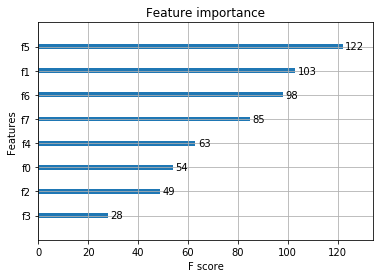

In [5]:
plot_importance(model)
pyplot.show()

Features are named automatically by their index (i.e. from F0 to F7).

## Select features based on their importance
Feature importance scores can be used for feature selection. By setting a threshold, we can include only features that have an importance score above the threshold value.

Accuracy: 77.60%


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


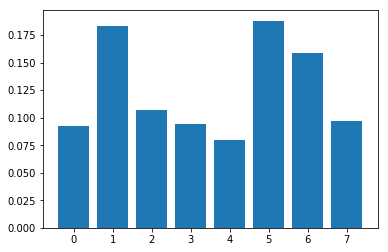

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8)

# Fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Show the feature importance scores for each feature
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [7]:
# Sort the feature importance scores from lowest to highest.
thresholds = sort(model.feature_importances_)
thresholds

array([0.07941653, 0.0923825 , 0.09400324, 0.09724473, 0.10696921,
       0.15883306, 0.18314424, 0.18800648], dtype=float32)

In [8]:
# For each importance score, re-train the model but using the score as a threshold.
# This results in the model only using features with a score higher than the threshold.
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.079, n=8, Accuracy: 77.60%
Thresh=0.092, n=7, Accuracy: 78.25%
Thresh=0.094, n=6, Accuracy: 77.60%
Thresh=0.097, n=5, Accuracy: 77.27%
Thresh=0.107, n=4, Accuracy: 77.60%
Thresh=0.159, n=3, Accuracy: 75.65%
Thresh=0.183, n=2, Accuracy: 76.95%
Thresh=0.188, n=1, Accuracy: 66.23%


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

In this example, with only 4 features, we have approximately the same accuracy as with all 8 features. Feature selection is a useful strategy when using larger datasets.